# Beer reivew analysis

The beer review data set is available at https://www.kaggle.com/rdoume/beerreviews.

Following kernel performs data analysis and tries to look for the weirdest beers as well as tries to recommend beers to a friend. Also looking for factor most contributing to the overall review of the beer.

### Load libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

import warnings
warnings.filterwarnings('ignore')

from IPython import display

### Load data and initial EDA

In [2]:
data = pd.read_csv('beer_reviews_2.csv')
data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [3]:
#Convert the review_time to date
data['review_time'] = pd.to_datetime(data.review_time, unit = 's')

In [4]:
print("Shape of the dataset: ", data.shape)
print("\nGeneral description of data:")
data.describe()

Shape of the dataset:  (1586614, 13)

General description of data:


,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


Max ABV of 57.7 and minimum o 0.001!! That's some strong beer and week beer respevtively.

In [5]:
#checking for nulls
pd.DataFrame(data.isna().sum()).T

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,15,0,0,0,0,348,0,0,0,0,67785,0


**Not many nulls. Leaving them in dataset as it is for this analysis. The rows with null brewery name and reviewer name can also be proabably removed safely.**

In [6]:
#Checking for data types
data.dtypes

brewery_id                     int64
brewery_name                  object
review_time           datetime64[ns]
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_profilename            object
beer_style                    object
review_palate                float64
review_taste                 float64
beer_name                     object
beer_abv                     float64
beer_beerid                    int64
dtype: object

In [7]:
#Checking for minimum as maximum date
print("minimum date = {} and maximum date = {}".format(data.review_time.min(), data.review_time.max()))

minimum date = 1996-08-22 00:00:01 and maximum date = 2012-01-11 12:35:48


In [8]:
data.review_overall.value_counts()

4.0    582764
4.5    324385
3.5    301817
3.0    165644
5.0     91320
2.5     58523
2.0     38225
1.5     12975
1.0     10954
0.0         7
Name: review_overall, dtype: int64

Very few 0 reviews. Can be removed though will keep in the dataset for now.

### More visual EDA

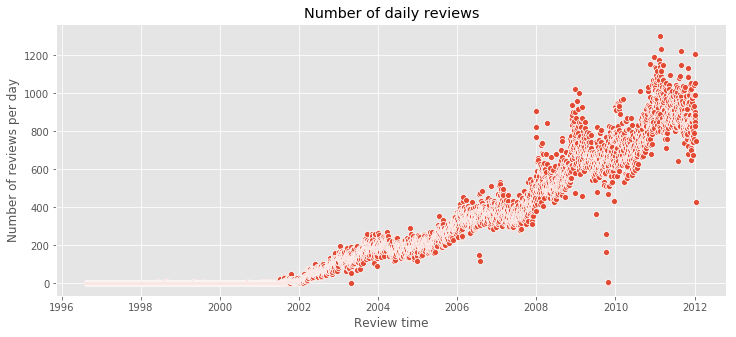

In [9]:
#Checking for number of daily reviews

df_daily = data.sort_values(by = 'review_time').resample('D', on = 'review_time').count()
df_daily.head()

plt.figure(figsize = (12,5))
sns.scatterplot(y =df_daily.review_overall, x = df_daily.index)
plt.title("Number of daily reviews")
plt.xlabel("Review time");plt.ylabel("Number of reviews per day")
plt.show()

Not many beer reviews till year 2001. So removing them  from analysis

In [10]:
df = data[data.review_time.dt.year >= 2001].copy()

#### Checking for distribution of numerical variables
Beer ID and Brewery ID are ID columns. So will treat them as categorical

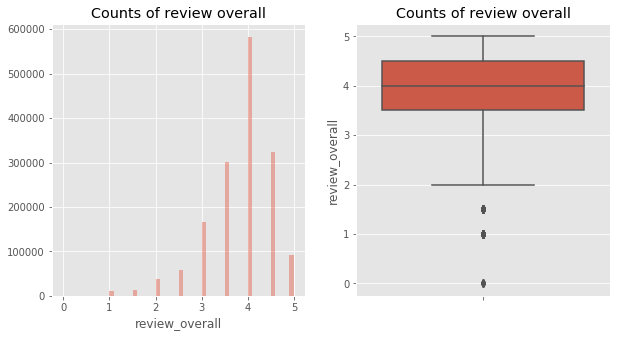

In [11]:
# Check for review overall
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.distplot(df.review_overall, ax = ax[0], kde = False)
ax[0].set_title('Counts of review overall')

sns.boxplot(df.review_overall, ax = ax[1], orient = 'v')
ax[1].set_title('Counts of review overall')
plt.show()

Most beers have a high ratings.. Will look at lower rated for some analysis

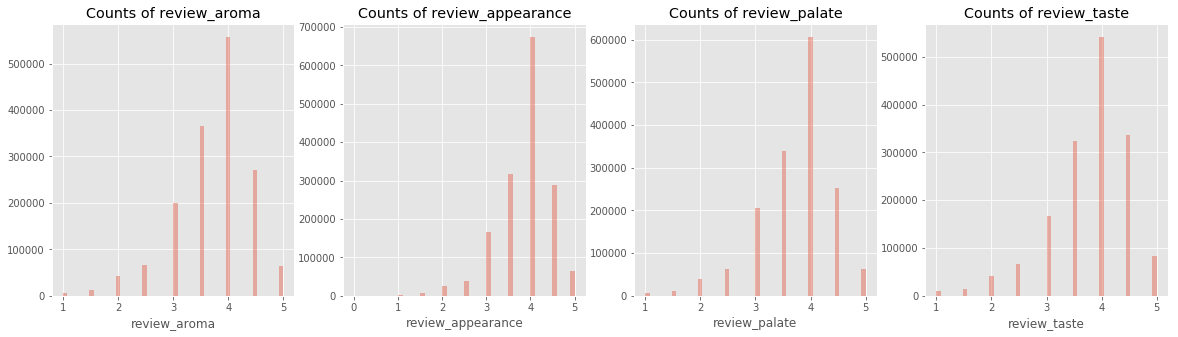

In [12]:
#Checking for types of reviews and their counts

fig, ax = plt.subplots(1,4, figsize = (20,5))
i = 0
for review in ['review_aroma','review_appearance', 'review_palate', 'review_taste']:
    sns.distplot(df[review], ax = ax[i], kde = False)
    ax[i].set_title('Counts of {}'.format(review))
    i += 1

##### Looks like most reivewers have high opinion for appearances and palate. Taste and aroma are more spread out.

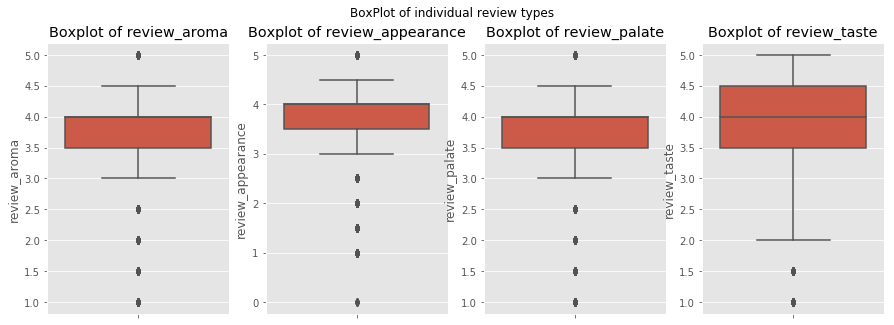

In [13]:
## Checking the distribution through boxplots
fig, ax = plt.subplots(1,4, figsize = (15,5))
fig.suptitle("BoxPlot of individual review types")
i = 0
for review in ['review_aroma','review_appearance', 'review_palate', 'review_taste']:
    sns.boxplot(df[review], ax = ax[i], orient = 'v')
    ax[i].set_title('Boxplot of {}'.format(review))
    i += 1

#### We can see taste is very the most varied among all kind of reviews. Aroma and Palate almost mirror each other

Text(0.5, 1.0, 'Boxplot of beer ABV')

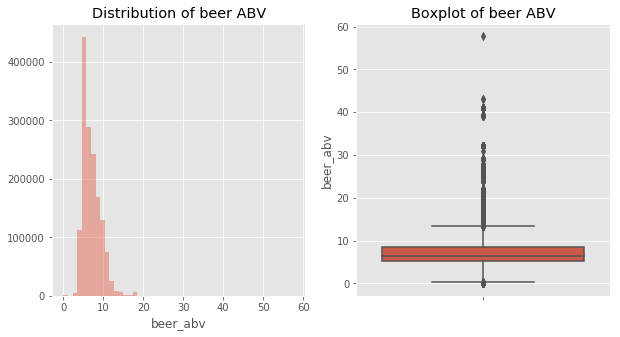

In [14]:
## Checking for ABV
fig, ax = plt.subplots(1,2, figsize = (10,5))

#Removing null values for distribution plot
sns.distplot(df[df.beer_abv.notna()].beer_abv, ax = ax[0], kde = False)
ax[0].set_title('Distribution of beer ABV')

sns.boxplot(df.beer_abv, ax = ax[1], orient = 'v')
ax[1].set_title('Boxplot of beer ABV')

Looks like there are some special beers with very high ABV. Though most beers are near the 5% ABV

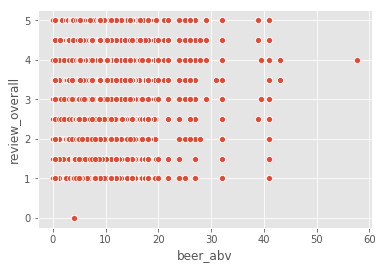

In [15]:
##Checking relationship of ABV with overall ratings

sns.scatterplot(x = 'beer_abv', y = 'review_overall', data = df )

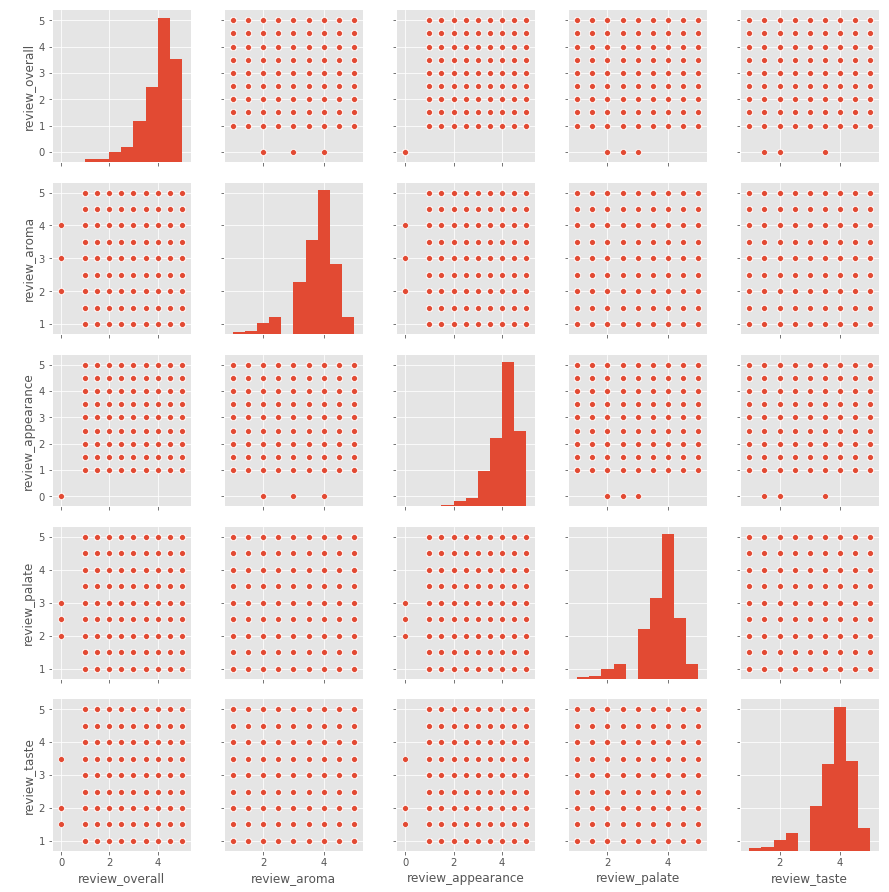

In [16]:
## Creating a pair plot of all numeric variables
sns.pairplot(df[['review_overall','review_aroma','review_appearance', 'review_palate', 'review_taste']])

Pair plot is not a whole lot informative

## Checking for categorical variables

In [17]:
dtypes = dict(df.dtypes)
categorical_vars = [var for var in dtypes.keys() if dtypes[var] =='O']
print(categorical_vars)

## Adding brewery ID and beer ID to categorical vars
categorical_vars2 = categorical_vars + ['brewery_id','beer_beerid']

['brewery_name', 'review_profilename', 'beer_style', 'beer_name']


In [18]:
for var in categorical_vars2:
    print("Number of unique {}: {}".format(var, df[var].nunique()))

Number of unique brewery_name: 5738
Number of unique review_profilename: 33387
Number of unique beer_style: 104
Number of unique beer_name: 56779
Number of unique brewery_id: 5836
Number of unique beer_beerid: 65959


In [19]:
x = data.groupby('beer_name').apply(lambda x: x.beer_beerid.nunique())
x[x>1].sample(5)

beer_name
Sledgehammer Stout    2
Galena IPA            2
Jingle Ale            2
Harvest Pils          2
Icarus                2
dtype: int64

In [20]:
#Taking one beer with 11 unique beer IDs
data[data.beer_name == 'Abbey Normal'].head(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
14959,14,Cambridge Brewing Company,2009-03-26 18:51:57,3.5,4.5,3.0,EPICAC,Dubbel,4.0,4.5,Abbey Normal,7.6,2788
14960,14,Cambridge Brewing Company,2009-02-26 21:40:31,4.0,3.5,3.5,IBUnit63,Dubbel,4.0,4.0,Abbey Normal,7.6,2788
14961,14,Cambridge Brewing Company,2002-02-17 19:02:45,4.5,4.0,3.5,Jason,Dubbel,4.5,4.0,Abbey Normal,7.6,2788
14962,14,Cambridge Brewing Company,2002-02-17 10:52:38,4.0,4.0,2.5,Todd,Dubbel,4.0,4.0,Abbey Normal,7.6,2788
14963,14,Cambridge Brewing Company,2002-02-16 20:01:24,4.0,4.0,4.5,Bierman9,Dubbel,4.0,4.0,Abbey Normal,7.6,2788
256608,3042,BJ's Restaurant & Brewhouse,2011-04-19 23:18:29,3.5,3.5,3.5,tbern007,Dubbel,3.5,3.5,Abbey Normal,6.6,67960
256609,3042,BJ's Restaurant & Brewhouse,2011-04-09 20:50:00,3.5,3.5,4.0,BretSikkink,Dubbel,3.5,3.5,Abbey Normal,6.6,67960
327427,1912,Milwaukee Ale House,2009-11-01 12:45:19,4.0,3.5,3.5,nsmartell,Belgian Strong Pale Ale,4.5,4.0,Abbey Normal,7.3,53829
394071,2711,BJ's Restaurant & Brewery,2011-04-19 15:30:57,3.5,4.0,4.0,womencantsail,Dubbel,4.0,3.0,Abbey Normal,6.6,67912
685369,1340,Gaslight Brewery & Restaurant,2011-06-19 01:44:05,3.0,3.0,3.5,Rifugium,Dubbel,3.0,3.0,Abbey Normal,6.9,36981


The number of unique brewery ID and Brewery Name don't match. More IDs than name. Could be because some breweries have common name or just data is not clean. We won't worry about it this anlaysis and use Brewery name as **unique brewery identifier**. 

Same goes for Beer name and Beer ID. The beer ID and Brewery ID are not quite matching with other data. Hence will use beer name as our **unique identifier of beer**.

Top 5 most number of reviewed:


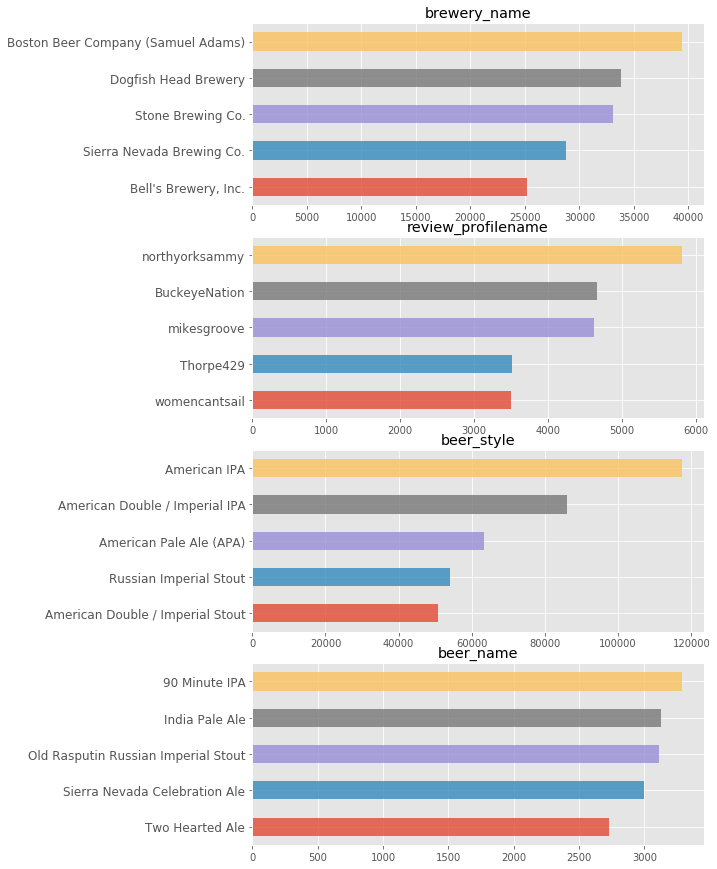

In [21]:
print("Top 5 most number of reviewed:")
fig, ax = plt.subplots(len(categorical_vars),1, figsize = (7,12))
fig.tight_layout()

i = 0
for var in categorical_vars:
    df[var].value_counts().head().sort_values().plot(kind = 'barh', ax = ax[i], alpha = 0.8)
    ax[i].set_title(var, loc = 'center');ax[i].tick_params(axis = 'y', labelsize = 12)
    i += 1


- Boston Beer Company is the most reviewed brewery.
- Nortyyorksammy is a prolific reviewer of beers.
- IPA seems to be having the most fan following and reviews.
- 90 Minute IPA is the most reviewed beer

#### Now checking for beers with best overall reviews

Starting with brewery

In [22]:
df.groupby('brewery_name').mean().sort_values(by ='review_overall', ascending = False).head(10)

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_name,,,,,,,,
Round Guys Brewing Company,27844.0,5.0,4.00,4.00,5.00,4.5,4.0,76354.0
"Hosokawa Sake Brewing Co., Ltd.",13866.0,5.0,3.75,3.75,3.75,4.0,5.0,30627.5
Restaurant Flieger Bräu,3693.0,5.0,4.00,4.50,4.00,4.5,NaN,8553.0
Thai Me Up,24056.0,5.0,5.00,5.00,4.50,5.0,7.5,62740.0
Brauerei Gasthof Pfister GmbH,15828.0,5.0,3.00,5.00,4.50,4.5,4.6,62263.0
Binghams Brewery,25943.0,5.0,5.00,4.50,4.50,5.0,5.0,70778.0
Weissbräu Kösslarn,6225.0,5.0,4.50,5.00,5.00,4.5,4.6,15502.0
Brauerei Gundel,5825.0,5.0,4.50,5.00,5.00,4.5,5.2,69880.0
Paulaner Brauhaus (Pulana Pijiu Fang),3625.0,5.0,4.50,4.50,4.50,4.5,NaN,45620.0


More than 10 breweries have the perfect rating. However, this can be skewed as it doesn't contain information about how many reviewes a brewery has received. Adding the number of reviews also in the analysis

In [23]:
df.groupby('brewery_name', as_index = False).agg({'review_overall' :['mean', 'count'], 'review_taste': 'mean'}).sort_values(by = [('review_overall', 'mean')], ascending = False).head()

brewery_name review_overall       review_taste
                                                mean count         mean
4517       Round Guys Brewing Company            5.0     1          4.5
2787  Hosokawa Sake Brewing Co., Ltd.            5.0     2          4.0
4421          Restaurant Flieger Bräu            5.0     2          4.5
5081                       Thai Me Up            5.0     1          5.0
999     Brauerei Gasthof Pfister GmbH            5.0     1          4.5

**As can be seen, most highly rated breweries have very less reviews, thereby skewing the distribution. To address this, will look only at breweries that have received atleast "100" reviews.**

In [24]:
def best_mean_review(dataf, group_col,target_col, min_reviews= 100):
    """
    Function to get the highest valued target col groupe by group col with atleast minimum number of reviews
    """
    df_col = dataf.groupby(group_col).agg({target_col :['mean', 'count']})
    df_col = df_col[df_col.loc[:,(target_col, 'count')] >= min_reviews].sort_values(by = [(target_col, 'mean')], ascending = False)
    return df_col

print("Top 5 breweries with highest average overall review and number of reviews(>=100): ")
best_mean_review(df, 'brewery_name', 'review_overall', 100).head()

Top 5 breweries with highest average overall review and number of reviews(>=100): 


review_overall       
                                                             mean  count
brewery_name                                                            
The Alchemist                                            4.582543    527
Brouwerij Westvleteren (Sint-Sixtusabdij van We...       4.544996   2378
Russian River Brewing Company                            4.373884  11311
Närke Kulturbryggeri AB                                  4.363208    212
Badische Staatsbrauerei Rothaus AG                       4.357143    126

**Continuing for beer name and beer type**

In [25]:
best_mean_review(df, 'beer_name', 'review_overall', 100).head()

review_overall      
                                                  mean count
beer_name                                                   
Citra DIPA                                    4.630952   252
Cantillon Blåbær Lambik                       4.628205   156
Heady Topper                                  4.625800   469
Deviation - Bottleworks 9th Anniversary       4.620536   112
Trappist Westvleteren 12                      4.617925  1272

In [26]:
best_mean_review(df, 'beer_style', 'review_overall', 100).head()

review_overall       
                                           mean  count
beer_style                                            
American Wild Ale                      4.093262  17794
Gueuze                                 4.086287   6009
Quadrupel (Quad)                       4.071634  18085
Lambic - Unblended                     4.048923   1114
American Double / Imperial Stout       4.029820  50704

**As we saw The Alchemist brewery, Citra DIPA beer, and the American Wild Ale beer style are the best in their categories with atleast 100 reviews**

Will quickly check the worst reviewed brewery, beer type, and beer name too

In [27]:
def worst_mean_review(dataf, group_col,target_col, min_reviews= 100):
    """
    """
    df_col = dataf.groupby(group_col).agg({target_col :['mean', 'count']})
    df_col = df_col[df_col.loc[:,(target_col, 'count')] >= min_reviews].sort_values(by = [(target_col, 'mean')], ascending = True)
    return df_col

print("top 5 worst reviewed brewery, beer name, and beer style with atleast 100 reviews:")
print(worst_mean_review(df, 'brewery_name', 'review_overall', 100).head())
print(worst_mean_review(df, 'beer_name', 'review_overall', 100).head())
print(worst_mean_review(df, 'beer_style', 'review_overall', 100).head())

top 5 worst reviewed brewery, beer name, and beer style with atleast 100 reviews:
                          review_overall      
                                    mean count
brewery_name                                  
Chili Beer Co.                  1.614183   416
Camo Brewing Company            1.956395   172
Melanie Brewing Company         2.080769   260
Pizza Beer Company              2.380342   117
Green's Gluten Free Beers       2.518293   164
                                                   review_overall      
                                                             mean count
beer_name                                                              
Crazy Ed's Cave Creek Chili Beer                         1.488764   267
Original C Cave Creek Chili Beer - Cerveza Con ...       1.681818   132
Bud Light Chelada                                        1.710526   114
Wild Blue (Blueberry Lager)                              1.924274   482
Budweiser Chelada                     

### For any further analysis, and recommendation, the "review_overall" would be the suitable target variables. Doing additional anlaysis with it.

Text(0.5, 1.0, 'Correlation between relevant numeric variables')

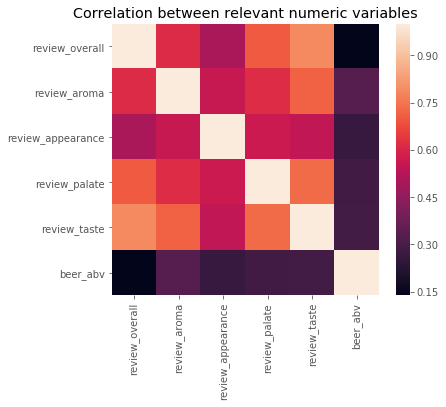

In [28]:
review_vars = ['review_overall','review_aroma','review_appearance', 'review_palate', 'review_taste']
fig, ax = plt.subplots(figsize = (6,5))
sns.heatmap(df[review_vars+['beer_abv']].corr())
plt.title('Correlation between relevant numeric variables')

In [29]:
## Checking the raw numbers
df[review_vars+['beer_abv']].corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_overall,1.000000,0.616014,0.501754,0.701899,0.789808,0.138524
review_aroma,0.616014,1.000000,0.561039,0.616936,0.716782,0.332571
review_appearance,0.501754,0.561039,1.000000,0.566660,0.547015,0.263941
review_palate,0.701899,0.616936,0.566660,1.000000,0.734120,0.286714
review_taste,0.789808,0.716782,0.547015,0.734120,1.000000,0.290845
beer_abv,0.138524,0.332571,0.263941,0.286714,0.290845,1.000000


**Overall review seems to be most correlated on the tase and palate of the beer. There is signification correlation between taste, palate, aroma as well.**


### Finding the weirdest beers?

### Recommend 3 beers, based on all possible data horizons, to your buddy based on this dataset? And why?

### What are the most important factors for estimating the overall quality of a beer? 

We can define the weirdest beers by its ABV, 

**We can define the weirdest beers by its ABV, name, brewery** Let's explore

In [30]:
##removing brewery_id and beer_id from dataset
df = df.drop(columns = ['brewery_id', 'beer_beerid'])

In [31]:
#Checking overall grouped mean of review_overall
df.groupby('review_overall').mean()

,review_aroma,review_appearance,review_palate,review_taste,beer_abv
review_overall,,,,,
0.0,2.571429,0.000000,2.500000,2.142857,4.000000
1.0,1.906136,2.554008,1.792960,1.347973,6.521565
1.5,2.192785,2.751638,2.107377,1.738110,6.181185
2.0,2.600591,3.063978,2.504408,2.214525,6.323999
2.5,2.918702,3.265034,2.840607,2.671594,6.391848
3.0,3.234583,3.478690,3.174763,3.135192,6.485292
3.5,3.583241,3.726388,3.556327,3.586409,6.872185
4.0,3.874905,3.933317,3.897373,3.986722,7.158555
4.5,4.120834,4.120774,4.177546,4.303998,7.394581


## Adding features that could be useful for analysis and also feature engineering

Adding length of name of beer and brewery name

In [32]:
df['beer_name_len'] = df.beer_name.str.len()
df['brewery_name_len'] = df.brewery_name.str.len()

Adding average overall review and number of reviews for each group of beer, beer style and brewery name

In [33]:
df['beer_avg_review'] = df.groupby('beer_name')['review_overall'].transform("mean")
df['beer_num_reviews'] = df.groupby('beer_name')['review_overall'].transform("count")

df['beer_style_avg_review'] = df.groupby('beer_style')['review_overall'].transform("mean")
df['beer_style_num_reviews'] = df.groupby('beer_style')['review_overall'].transform("count")

df['brewery_avg_review'] = df.groupby('brewery_name')['review_overall'].transform("mean")
df['brewery_num_reviews'] = df.groupby('brewery_name')['review_overall'].transform("count")

In [34]:
## Adding year, date, and month variable

df['review_year'] = df.review_time.dt.year
df['review_month'] = df.review_time.dt.month
df['review_day'] = df.review_time.dt.day

In [35]:
df.head(2)

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_name_len,brewery_name_len,beer_avg_review,beer_num_reviews,beer_style_avg_review,beer_style_num_reviews,brewery_avg_review,brewery_num_reviews,review_year,review_month,review_day
0,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,12,15.0,1.5,1,3.929577,27903,2.625,4.0,2009,2,16
1,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,8,15.0,3.0,1,3.783243,4798,2.625,4.0,2009,3,1


In [36]:
## Beers with highest ABV
df.groupby('beer_name').agg({'beer_abv': 'mean', 'review_overall':['mean', 'count']}).sort_values(by = [('beer_abv','mean')], ascending = False).head(10)

beer_abv review_overall      
                                  mean           mean count
beer_name                                                  
Schorschbräu Schorschbock 57%    57.70       4.000000     1
Schorschbräu Schorschbock 43%    43.00       3.750000     2
Sink The Bismarck!               41.00       3.197368    76
Schorschbräu Schorschbock 40%    39.44       3.333333     3
Black Damnation VI - Messy       39.00       4.500000     7
Tactical Nuclear Penguin         32.00       3.187500    88
Schorschbräu Schorschbock 31%    30.86       3.500000     1
Dave                             29.00       4.437500    16
Ghost Deer                       28.00       3.500000     3
Samuel Adams Utopias             27.00       4.066197   355

In [37]:
## Beers with lowest ABV
df.groupby('beer_name').agg({'beer_abv': 'mean', 'review_overall':['mean', 'count']}).sort_values(by = [('beer_abv','mean')]).head(10)

beer_abv review_overall      
                                      mean           mean count
beer_name                                                      
Lindemans Chello                      0.01       3.750000     2
Liber                                 0.01       1.166667     3
Genesee NA                            0.05       1.800000    10
Faxe Free                             0.05       2.000000     1
Xan Wellness                          0.05       5.000000     1
Bavaria Malt                          0.05       2.250000     2
Arcobräu Non-Alcoholic Pale Weiss     0.05       4.000000     1
Budweiser NA                          0.05       2.250000     2
Jupiler Force                         0.08       1.000000     1
Amstel Malt                           0.10       3.250000     2

In [38]:
##Beers with longest name
df.groupby('beer_name').first()\
.sort_values(by= 'beer_name_len', ascending = False)[['beer_name_len','beer_avg_review','beer_num_reviews']].head(5)

,beer_name_len,beer_avg_review,beer_num_reviews
beer_name,,,
110K+OT Batch #2 - I.R.I.S. - Cherry Hazelnut Cacao Nib Bourbon Barrel Aged,75,4.000000,1
Hamilton's Back In Black Imperial Chili Spiced Chocolate Milk Coffee Porter,75,4.500000,3
Alesmith Speedway Stout - Madagascar Organic Fair Trade Cocoa Nibs Speedway,75,3.500000,1
Br&#257;lis Gaiais Nefiltr&#275;ts Alus (Br&#257;lis Pale Unfiltered Beer),75,3.500000,2
Einer's Folly Vanilla Imperial Porter (Holiday Wine Cellar's 45th Aniv Ale),75,3.704545,44


In [39]:
##Beers with smallest name
df.groupby(['brewery_name','beer_name']).first()\
.sort_values(by= 'beer_name_len')[['beer_name_len','beer_avg_review','beer_num_reviews']].head(10)

,,beer_name_len,beer_avg_review,beer_num_reviews
brewery_name,beer_name,,,
Le Trou Du Diable,V,1,3.650000,10
Silver City Brewing Co.,X,1,4.500000,3
Brasseurs Illimités,S,1,3.428571,7
Brasserie Bièropholie,S,1,3.428571,7
Bitter End Brewery and Bistro,M,1,4.000000,1
Fratello's & Fox River Brewing,X,1,4.500000,3
Bernard Family Brewery,OX,2,3.000000,1
Birra Del Borgo,Tè,2,3.833333,12
Brasseurs Illimités,OR,2,3.000000,2


## Weirdest beers
1. **"Schorschbräu Schorschbock 57%"** for its 57% of beer alcohol by volumne which is more than whiskey. Though it has just one review. There are actually about 7 beers with more than 30 % ABV. 
2. **"Sink The Bismarck!"** for one of highest ABV of and still have about a fan following with 76 reviews!
3. **"Lindemans Chello" and "Liber** for lowest ABV of 0.01 ABV. Why even call it beer??
4. **"Einer's Folly Vanilla Imperial Porter (Holiday Wine Cellar's 45th Aniv Ale)"** for  the longest name though with sufficient number of reviews (75). Long name but not very obscure beer.
5. Beers with single letter name like **'V', 'X', 'S', 'M', 'X'**. That's some weird and lazy naming!!

## Recommendations

Recommendations can be provided to a person based on multiple criteria. In a review based dataset, the best way to provide recommendation is through a recommender system. The supervised model is trained on user reviews and user profiles. It then looks at the exisint reviews of a person recommends products based on what other  profiles have reviewed. The algorithms used for this are collaborative filtering, and matrix decomposition. So in this example, I'll ask my buddy which beers he/she likes and then use my model to recommend the personalized beer.

_However,_ in this data we don't know many features of beer and due to time limit, I'll take following approaches:
1. Go with the crowd. Recommend the 3 beers with highest ratings and approximately *half the number of reviews* than that of most reviewed beer in last _2 years_. 
2. Assume user's preferences. Assuming my buddy likes Belgian IPA. Will recommend best rated Belgian IPA to him. 
3. Recommend based on beer's attribute. This data has 5 attributes about beer and it's reviews:
    * review_overall, review_aroma, review_appearance, review_palate, review_taste, beer_abv. Assuming for my buddy, the the aroma is most important factor. So, I'll look for beer with highest rated aroma with at least 100 reviews.
4. Build a  regression model with review_overall as target variable and the dataset features and the new features as independent variables. Then pick up the most important features to derive recommendations.

#### Recommendation approach 1
Go with the crowd. Recommend the beers with highest ratings and atleast half the reviews compared to that of the max reviewed beer in last 2 years.

In [40]:
num_max = df[df.review_year >= 2010].groupby('beer_name').count()['brewery_name'].sort_values(ascending = False).head(1).values
print("Number of reviews received by most reviewed beer since 2010: ", num_max)

Number of reviews received by most reviewed beer since 2010:  [1334]


In [41]:
# Since the most reviewed beer had 1334 reviews, using 600 to threshold the highest rated beer of last 3 years

#Using the function created earlier
best_mean_review(df[df.review_year >= 2010], 'beer_name', 'review_overall', 600).head(3)

review_overall      
                                        mean count
beer_name                                         
Pliny The Elder                     4.627061  1334
Weihenstephaner Hefeweissbier       4.529455   679
The Abyss                           4.462838   740

Based on this approach, the 3 recommended beers are 
1. "Pliny The Elder", 
2. "Weihenstephaner Hefeweissbier", and 
3. "The Abyss"

#### Recommendation approach 2
Assuming my buddy likes Belgium IPA beer style. Looking for highest rated Belgium IPA along with atleast 100 reviews to eliminate obscure beers.

In [42]:
best_mean_review(df[df.beer_style == 'Belgian IPA'], 'beer_name', 'review_overall', 100).head(3)

review_overall      
                                              mean count
beer_name                                               
Bitter Monk                               4.314159   113
Duvel Tripel Hop                          4.208333   204
Houblon Chouffe Dobbelen IPA Tripel       4.177833  1015

Based on this approach, the 3 recommended beers are 
1. "Bitter Monk	", 
2. "Duvel Tripel Hop", and 
3. "Houblon Chouffe Dobbelen IPA Tripel"

#### Recommendation approach 3
Assuming for my buddy, the the aroma is most important factor. So, I'll look for beer with highest rated aroma with at least 100 reviews.

In [43]:
best_mean_review(df, 'beer_name', 'review_aroma', 100).head(3)

review_aroma      
                                    mean count
beer_name                                     
Pliny The Younger               4.723770   610
Vanilla Bean Aged Dark Lord     4.717105   152
Citra DIPA                      4.690476   252

Based on this approach, the 3 recommended beers are 
1. "Pliny The Younger", 
2. "Vanilla Bean Aged Dark Lord" 
3. "Citra DIPA"

## Factors for estimating overall quality of a beer

I will build multiple classification and regression models with *review_overall* as target variable to find the relationship between beer rating and differnt variables.

#### 1. Regression models 

Preparing the data. I've added several features to the dataframe earlier as **feature engineering**. Adding a few more.

In [44]:
print(df.columns)

Index(['brewery_name', 'review_time', 'review_overall', 'review_aroma',
       'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_name_len', 'brewery_name_len', 'beer_avg_review',
       'beer_num_reviews', 'beer_style_avg_review', 'beer_style_num_reviews',
       'brewery_avg_review', 'brewery_num_reviews', 'review_year',
       'review_month', 'review_day'],
      dtype='object')


In [45]:
df['beer_name_brewery_avg_review'] = df.groupby(['brewery_name', 'beer_name'])['review_overall'].transform('mean')
df['beer_name_brewery_avg_count'] = df.groupby(['brewery_name', 'beer_name'])['review_overall'].transform('count')

In [46]:
#Column to check for ABV null
df["ABV_Null"] = df.beer_abv.isna().astype(int)

The new average columns for brewery_name, beer_style, and beer_name are for target encoding. In the current way it might cause overfitting. In practise, I would create smoothed average. 

Also the purpose here is not to predict but to find the most important features. Hence also not splitting into training and test set.

In [47]:
#Removing rows with empty brewery Name
df_train = df[df.brewery_name.notna()].copy()

#Imputing null values of ABV with median ABV of beer style
df_train['beer_abv'] = df.groupby('beer_style')['beer_abv'].transform(lambda x: x.fillna(x.mean()))

In [48]:
## Listing the columns to be used for modeling

orig_training_cols = ['review_aroma', 'review_appearance','review_palate', 'review_taste', 'beer_abv']

all_training_cols = ['review_aroma', 'review_appearance','review_palate', 'review_taste', 'beer_abv',
                'beer_name_len', 'brewery_name_len', 'beer_avg_review',
       'beer_num_reviews', 'beer_style_avg_review', 'beer_style_num_reviews',
       'brewery_avg_review', 'brewery_num_reviews', 'review_year',
       'review_month', 'review_day', 'beer_name_brewery_avg_review','beer_name_brewery_avg_count', 'ABV_Null']

target = 'review_overall'

#### Fitting linear model

On original variables

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)

lr.fit(df_train[orig_training_cols], df_train.review_overall)
print("R squared: ",lr.score(df_train[orig_training_cols], df_train.review_overall))

R squared:  0.6735012593588625


In [50]:
import statsmodels.api as sm
df_train = sm.add_constant(df_train)

lr_sm = sm.OLS(df_train.review_overall, df_train[orig_training_cols +['const']]).fit()
# predictions = lr_sm.predict(X) 

print_model = lr_sm.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         review_overall   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                 6.544e+05
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:30:17   Log-Likelihood:            -8.4335e+05
No. Observations:             1586260   AIC:                         1.687e+06
Df Residuals:                 1586254   BIC:                         1.687e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
review_aroma          0.0768      0.00

Linear models on original + new variables

In [51]:
lr = LinearRegression(normalize = True)

lr.fit(df_train[all_training_cols], df_train.review_overall)
print("R squared: ",lr.score(df_train[all_training_cols], df_train.review_overall))

R squared:  0.6804525347967145


Not much improvement. So going ahead with next model

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=1234)
rf.fit(df_train[orig_training_cols], df_train.review_overall)
print("R squared: ",r2_score(df_train.review_overall, rf.predict(df_train[orig_training_cols])))

R squared:  0.6654622277087194


In [53]:
for name, score in zip(orig_training_cols, rf.feature_importances_):
        print(name,": ", score)

review_aroma :  0.0
review_appearance :  1.6174187216311902e-05
review_palate :  0.048236454421412944
review_taste :  0.9464607603701068
beer_abv :  0.005286611021263544


Running RandomForest on original + new colums

In [54]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=5, random_state=1234)
rf.fit(df_train[all_training_cols], df_train.review_overall)
print("R squared: ",r2_score(df_train.review_overall, rf.predict(df_train[all_training_cols])))

R squared:  0.6655073915805889


In [55]:
for name, score in zip(all_training_cols, rf.feature_importances_):
        print(name,": ", score)

review_aroma :  0.0
review_appearance :  1.617390066515947e-05
review_palate :  0.04822412689217265
review_taste :  0.9464338893803421
beer_abv :  0.005058910278691422
beer_name_len :  0.0
brewery_name_len :  0.0
beer_avg_review :  0.0
beer_num_reviews :  0.0
beer_style_avg_review :  0.0002641805299164754
beer_style_num_reviews :  0.0
brewery_avg_review :  0.0
brewery_num_reviews :  0.0
review_year :  0.0
review_month :  0.0
review_day :  0.0
beer_name_brewery_avg_review :  2.7190182127719584e-06
beer_name_brewery_avg_count :  0.0
ABV_Null :  0.0


#### LightGBM with original columns

In [56]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

Training until validation scores don't improve for 200 rounds.
[400]	training's rmse: 0.405654	valid_1's rmse: 0.406477
[800]	training's rmse: 0.4042	valid_1's rmse: 0.405304
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.403974	valid_1's rmse: 0.405192
R squared:  0.685375566562347


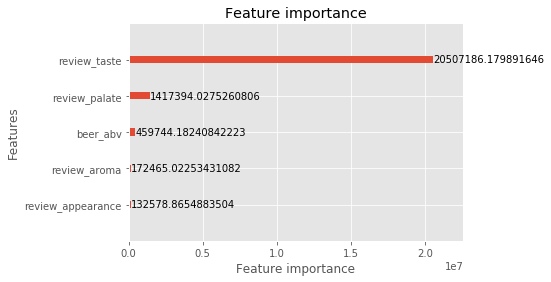

In [57]:
# Creating train-test set to enable early stopping
train_x, test_x,train_y,  test_y = train_test_split(df_train[orig_training_cols], df_train.review_overall,
                                                    test_size = 0.2)

train_data = lgb.Dataset(train_x, label = train_y)
val_data = lgb.Dataset(test_x, label = test_y)

params = {
    'metric': 'rmse',
    'objective': 'regression',
    'verbosity': 1,
    'boosting_type': 'gbdt',
   'learning_rate': 0.01
   #'reg_lambda': 0.747531261801519,       
}
num_round = 1000

model = lgb.train(params, train_data, num_boost_round = num_round, verbose_eval=400, 
                  valid_sets = [train_data, val_data],  early_stopping_rounds = 200)

print("R squared: ",r2_score(df_train.review_overall, model.predict(df_train[orig_training_cols])))

lgb.plot_importance(model, importance_type = 'gain')

#### LightGBM with original + new columns

Training until validation scores don't improve for 200 rounds.
[400]	training's rmse: 0.398481	valid_1's rmse: 0.398712
[800]	training's rmse: 0.393782	valid_1's rmse: 0.394346
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.392917	valid_1's rmse: 0.393631
R squared:  0.7025052832151222


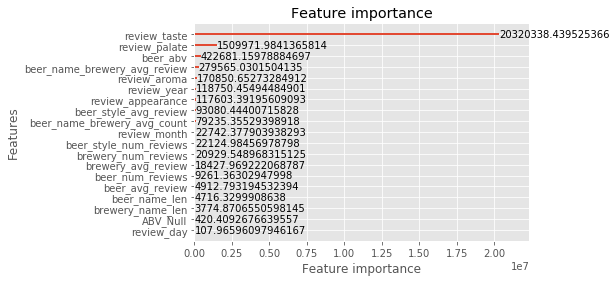

In [58]:
train_x, test_x,train_y,  test_y = train_test_split(df_train[all_training_cols], df_train.review_overall,
                                                    test_size = 0.2)

train_data = lgb.Dataset(train_x, label = train_y)
val_data = lgb.Dataset(test_x, label = test_y)

model = lgb.train(params, train_data, num_boost_round = num_round, verbose_eval=400, 
                  valid_sets = [train_data, val_data],  early_stopping_rounds = 200)

print("R squared: ",r2_score(df_train.review_overall, model.predict(df_train[all_training_cols])))

lgb.plot_importance(model, importance_type = 'gain')

### Finally running one classification model just to check

Rounding off the review overall column

In [59]:
df_train2 = df_train.copy()
df_train2.review_overall = round(df_train2.review_overall)
df_train2.head()

,const,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_name_len,brewery_name_len,beer_avg_review,beer_num_reviews,beer_style_avg_review,beer_style_num_reviews,brewery_avg_review,brewery_num_reviews,review_year,review_month,review_day,beer_name_brewery_avg_review,beer_name_brewery_avg_count,ABV_Null
0,1.0,Vecchio Birraio,2009-02-16 20:57:03,2.0,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,12,15.0,1.5,1,3.929577,27903,2.625000,4.0,2009,2,16,1.5,1.0,0
1,1.0,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,8,15.0,3.0,1,3.783243,4798,2.625000,4.0,2009,3,1,3.0,1.0,0
2,1.0,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,22,15.0,3.0,1,3.877679,5972,2.625000,4.0,2009,3,1,3.0,1.0,0
3,1.0,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,10,15.0,3.0,1,3.731525,22151,2.625000,4.0,2009,2,15,3.0,1.0,0
4,1.0,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,13,23.0,4.0,1,3.998017,85976,3.953881,889.0,2010,12,30,4.0,1.0,0


In [60]:
params = {
    'metric': 'multi_logloss',
    'objective': 'multiclass',
    'num_class':6,
    'verbosity': 1,
    'boosting_type': 'gbdt',
   'learning_rate': 0.01,
   'reg_lambda': 0.1       
}
num_round = 1000

train_x, test_x,train_y,  test_y = train_test_split(df_train2[all_training_cols], df_train2.review_overall,
                                                    test_size = 0.2)

train_data = lgb.Dataset(train_x, label = train_y)
val_data = lgb.Dataset(test_x, label = test_y)

model = lgb.train(params, train_data, num_boost_round = num_round, verbose_eval=400, 
                  valid_sets = [train_data, val_data],  early_stopping_rounds = 200)

Training until validation scores don't improve for 200 rounds.
[400]	training's multi_logloss: 0.452564	valid_1's multi_logloss: 0.455031
[800]	training's multi_logloss: 0.437722	valid_1's multi_logloss: 0.44132
Did not meet early stopping. Best iteration is:
[1000]	training's multi_logloss: 0.435039	valid_1's multi_logloss: 0.439358


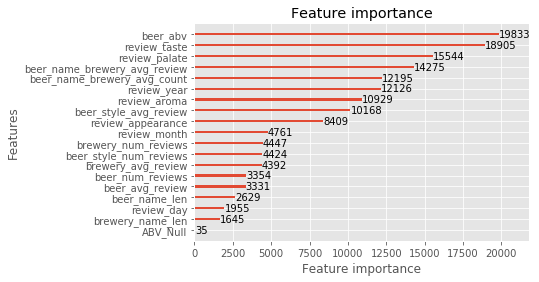

In [61]:
lgb.plot_importance(model, importance_type = 'split')

## Model selection

I'll choose the **regression model** for the estimation of beer quality as per review overall variable as the score is numeric and has an inherent numerical order in it. Among the regression models, I'll choose the **LightGBM model** as it provides the highest R2 value i.e. it is the best model among others. The gradient tree based models are also consistently perform very well in Data Science competitions. I'll also use the **new features** as the model score improved significantly after adding the new variables. 


## Business Narrative 
From the analysis, the most important factor which affects the overall quality of the beer is its taste. It's evident from multiple models as well as direct correlation,  beer taste is the most significant contributor to the over all quality of the beer. Most of the reviewers who gave a higher rating in taste of the beer, also gave a higher rating to overall quality of beer. The second most important factor which affect the quality of beer is beer palate, though to a lesser degree.

The beer aroma and appearance don't have much effect on the overall quality of beer even if we can see some correlation. It's because they are also quite dependent on beer taste and palate themselves. So they do not contribute much to the final review of the beer. In summary, a higher rating in any of category generally results in a higher rating of beer.

The beer ABV is next contributor to the beer quality. While one of the model says overall beer quality goes down with increasing ABV, it might not be the case for every beer as we saw some of the beers with very high/low values of ABV which might have led to average decrease in ratings. 

#### Recommendation approach 4
Since taste is the most important factor in beer quality, I'll ask suggest my buddy the beers with highest rating in taste.

## End of analysis